In [ ]:
from google.colab import drive
drive.mount('/content/drive')
root = '/content/drive/My Drive/Colab Notebooks/'
path = root+'HeartDisease.csv'


Mounted at /content/drive


In [ ]:
# Importing packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn import preprocessing


In [ ]:
df=pd.read_csv(path)
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Text(0.5, 1.0, 'target')

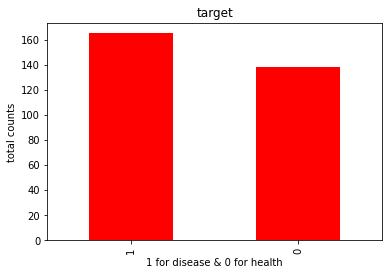

In [ ]:
df["target"].value_counts().plot.bar(color="red")
plt.xlabel("1 for disease & 0 for health")
plt.ylabel("total counts")
plt.title("target")

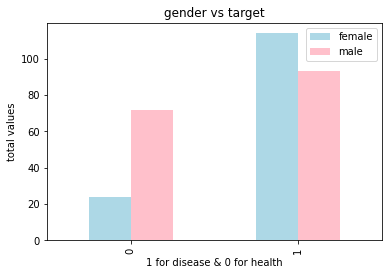

In [ ]:
pd.crosstab(df["gender"],df["target"]).plot(kind="bar",color=["lightblue","pink"])
plt.xlabel("1 for disease & 0 for health")
plt.ylabel("total values")
plt.title("gender vs target")
plt.legend(["female","male"])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, '0 for No disease and 1 for disease')

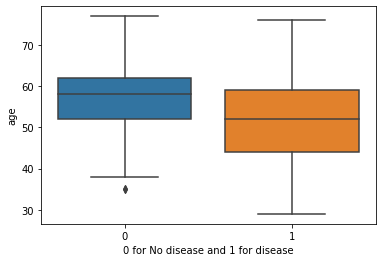

In [ ]:
sns.boxplot(df['target'],df['age'])
plt.xlabel('0 for No disease and 1 for disease')

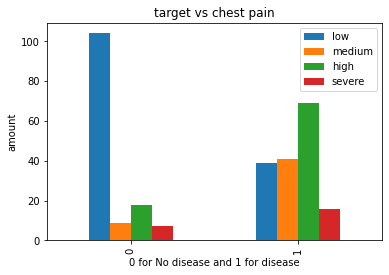

In [ ]:
pd.crosstab(df["target"],df["chest_pain"]).plot(kind="bar")
plt.xlabel("0 for No disease and 1 for disease")
plt.ylabel("amount")
plt.title("target vs chest pain")
plt.legend(["low","medium","high","severe"])

In [ ]:
#checking missing values  

In [ ]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [ ]:
# checking correlation 

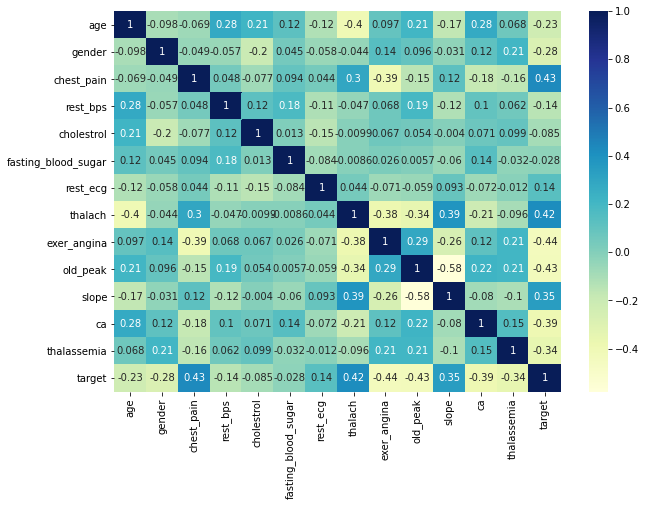

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

In [ ]:
# Defining Variable X and Y

In [ ]:
y=df["target"]
x = df.drop(["target"],axis=1)

scalar=preprocessing.StandardScaler().fit(x)
x=scalar.transform(x)


In [ ]:
# Splitting the Train and Test dataset

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=111)

In [ ]:
# Finding the best model for the dataset  

In [ ]:
compare={'logistic':LogisticRegression(),'KNN':KNeighborsClassifier(),'DTC':DecisionTreeClassifier(),'RBC':RandomForestClassifier()}
results_score={}
for model_name,model in compare.items():
  model.fit(x_train,y_train)
  results_score[model_name]=model.score(x_test,y_test)
  

In [ ]:
print(results_score)

{'logistic': 0.8791208791208791, 'KNN': 0.8021978021978022, 'DTC': 0.7802197802197802, 'RBC': 0.8241758241758241}


In [ ]:
for i in results_score.items():
  print(i)

('logistic', 0.8791208791208791)
('KNN', 0.8021978021978022)
('DTC', 0.7802197802197802)
('RBC', 0.8241758241758241)


In [ ]:
# Logistic Regression gives the highest Accuracy among other models

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print("classification report",classification_report(y_test,y_pred))

classification report               precision    recall  f1-score   support

           0       0.90      0.78      0.84        36
           1       0.87      0.95      0.90        55

    accuracy                           0.88        91
   macro avg       0.88      0.86      0.87        91
weighted avg       0.88      0.88      0.88        91



In [ ]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.8791208791208791

In [ ]:
print("train_score",model.score(x_train,y_train))
print("test_score",model.score(x_test,y_test))

train_score 0.8490566037735849
test_score 0.8791208791208791


In [ ]:
# Finding best parameters using GridSearch CV and RandomSearc CV

In [ ]:
log_reg_grid = {'C':np.logspace(-4,4,20),
                'penalty':['l1','l2','elasticnet','none'],
                'solver':['liblinear','sag','saga','newton-cg','lbfgs'],
                'max_iter':[100,1000,2500,5000]}

rg_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,cv=5,n_iter=20,verbose=2)
rg_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] solver=saga, penalty=l2, max_iter=100, C=1.623776739188721 ......
[CV]  solver=saga, penalty=l2, max_iter=100, C=1.623776739188721, total=   0.0s
[CV] solver=saga, penalty=l2, max_iter=100, C=1.623776739188721 ......
[CV]  solver=saga, penalty=l2, max_iter=100, C=1.623776739188721, total=   0.0s
[CV] solver=saga, penalty=l2, max_iter=100, C=1.623776739188721 ......
[CV]  solver=saga, penalty=l2, max_iter=100, C=1.623776739188721, total=   0.0s
[CV] solver=saga, penalty=l2, max_iter=100, C=1.623776739188721 ......
[CV]  solver=saga, penalty=l2, max_iter=100, C=1.623776739188721, total=   0.0s
[CV] solver=saga, penalty=l2, max_iter=100, C=1.623776739188721 ......
[CV]  solver=saga, penalty=l2, max_iter=100, C=1.623776739188721, total=   0.0s
[CV] solver=newton-cg, penalty=l2, max_iter=100, C=0.00026366508987303583 
[CV]  solver=newton-cg, penalty=l2, max_iter=100, C=0.00026366508987303583, total=   0.0s
[CV] solver=newton

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ign

[CV]  solver=sag, penalty=none, max_iter=1000, C=0.08858667904100823, total=   0.0s
[CV] solver=sag, penalty=none, max_iter=1000, C=0.08858667904100823 ..
[CV]  solver=sag, penalty=none, max_iter=1000, C=0.08858667904100823, total=   0.0s
[CV] solver=sag, penalty=none, max_iter=1000, C=0.08858667904100823 ..
[CV]  solver=sag, penalty=none, max_iter=1000, C=0.08858667904100823, total=   0.0s
[CV] solver=sag, penalty=none, max_iter=1000, C=0.08858667904100823 ..
[CV]  solver=sag, penalty=none, max_iter=1000, C=0.08858667904100823, total=   0.0s
[CV] solver=sag, penalty=l1, max_iter=5000, C=0.08858667904100823 ....
[CV]  solver=sag, penalty=l1, max_iter=5000, C=0.08858667904100823, total=   0.0s
[CV] solver=sag, penalty=l1, max_iter=5000, C=0.08858667904100823 ....
[CV]  solver=sag, penalty=l1, max_iter=5000, C=0.08858667904100823, total=   0.0s
[CV] solver=sag, penalty=l1, max_iter=5000, C=0.08858667904100823 ....
[CV]  solver=sag, penalty=l1, max_iter=5000, C=0.08858667904100823, total=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/

[CV]  solver=lbfgs, penalty=none, max_iter=1000, C=0.00026366508987303583, total=   0.0s
[CV] solver=liblinear, penalty=l2, max_iter=5000, C=10000.0 ..........
[CV]  solver=liblinear, penalty=l2, max_iter=5000, C=10000.0, total=   0.0s
[CV] solver=liblinear, penalty=l2, max_iter=5000, C=10000.0 ..........
[CV]  solver=liblinear, penalty=l2, max_iter=5000, C=10000.0, total=   0.0s
[CV] solver=liblinear, penalty=l2, max_iter=5000, C=10000.0 ..........
[CV]  solver=liblinear, penalty=l2, max_iter=5000, C=10000.0, total=   0.0s
[CV] solver=liblinear, penalty=l2, max_iter=5000, C=10000.0 ..........
[CV]  solver=liblinear, penalty=l2, max_iter=5000, C=10000.0, total=   0.0s
[CV] solver=liblinear, penalty=l2, max_iter=5000, C=10000.0 ..........
[CV]  solver=liblinear, penalty=l2, max_iter=5000, C=10000.0, total=   0.0s
[CV] solver=saga, penalty=elasticnet, max_iter=2500, C=0.004832930238571752 
[CV]  solver=saga, penalty=elasticnet, max_iter=2500, C=0.004832930238571752, total=   0.0s
[CV] so

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'max_iter': [100, 1000, 2500, 5000],
            

In [ ]:
rg_log_reg.best_params_

{'C': 0.03359818286283781, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'sag'}

In [ ]:
model=LogisticRegression(C=0.0335,solver='sag',penalty='l2',max_iter=5000,random_state=111) 
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [ ]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.8351648351648352

In [ ]:
print("train_score",rg_log_reg.score(x_train,y_train))
print("test_score",rg_log_reg.score(x_test,y_test))

train_score 0.8443396226415094
test_score 0.8791208791208791


In [ ]:
gr_log_cv=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,cv=5,verbose=True)
gr_log_cv.fit(x_train,y_train)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


Streaming output truncated to the last 5000 lines.
ValueError: Solver sag supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
V

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 2.6...
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [100, 1000, 2500, 5000],
               

In [ ]:
gr_log_cv.best_params_

{'C': 0.23357214690901212, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
# Accuracy is slightly increased after finding the best paramaters

In [ ]:
model=LogisticRegression(C=0.234,solver='saga',penalty='l2',max_iter=100,random_state=11) 
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [ ]:
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.8901098901098901

In [ ]:
print("train_score",gr_log_cv.score(x_train,y_train))
print("test_score",gr_log_cv.score(x_test,y_test))

train_score 0.839622641509434
test_score 0.8681318681318682


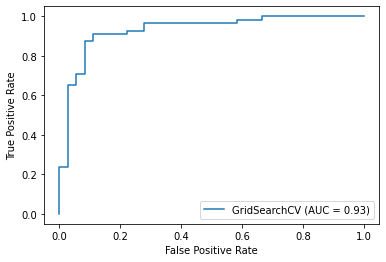

In [ ]:
plot_roc_curve(gr_log_cv,x_test,y_test)

In [ ]:
y_pred=gr_log_cv.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.72      0.81        36
           1       0.84      0.96      0.90        55

    accuracy                           0.87        91
   macro avg       0.88      0.84      0.86        91
weighted avg       0.88      0.87      0.86        91



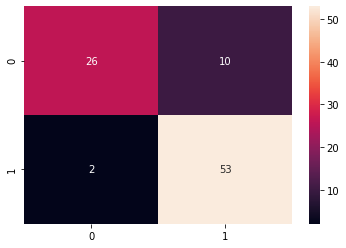

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)